In [1]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from dataset import LaserDataset
from transform import *

In [4]:
from model_torch import ShallowNet

In [5]:
from train import ShallowNet_Loss, train_ShallowNet

In [6]:
from model_torch import UNet11

In [7]:
import torch
from torch import optim

In [8]:
transform_train = _Compose([
#                         _RandomApply([
#                             _Resize(scale_range=(0.5, 1.5), raw=RAW_IMAGE_SIZE),
#                         ], p=0.99),
#                         _RandomCrop(MODEL_INPUT_SIZE, MODEL_INPUT_SIZE, padding_mode='symmetric'),
                        _RandomRotation(0.999, 360),
                        _ColorJitter(brightness=0.2, contrast=0.3, saturation=0.2, hue=0.02),
                        _RandomHorizontalFlip(0.5),
                        _RandomVerticalFlip(0.5),
#                         _RandomGrayscale(0.01),
                        _Lambda(lambda x, y: (_ToTensor()(x), _ToTensor()(y)))
                ])
laser_dataset = LaserDataset('laser/train', train=True, class_nums=2, transform=transform_train)
laser_loader = torch.utils.data.DataLoader(laser_dataset,
                                          batch_size=1,
                                          shuffle=True,
                                          num_workers=8)

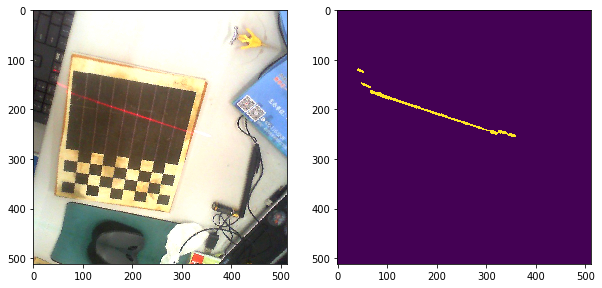

In [9]:
x, y = laser_dataset[10]
plt.figure(figsize=[10, 10])
plt.subplot(121)
plt.imshow(x.permute(1, 2, 0))
plt.subplot(122)
plt.imshow(y[0])

In [26]:
train_config = {
    'epochs':10, 
    'is_cuda_type': True,
    'print_log_every_step': 30,
    'learning_rate': 1e-4,
    'decay_learning_rate_at_epcho': [600, 1600]
}

In [27]:
log = {
    'loss': []
}

In [12]:
# model = ShallowNet()
# model = model.cuda()

In [13]:
model = UNet11(1).cuda()

In [39]:
loss_fn = ShallowNet_Loss()
optimizer = optim.Adam(params=model.parameters(), lr=1e-4)

In [41]:
train_ShallowNet(model, loss_fn, optimizer, laser_loader, log, **train_config)

learning_rate:  0.0001
Starting epoch 1 / 10
388
lr=0.000100000, t = 1, loss = 1.530697703,
395
425
394
166
167
363
375
71
459
233
372
127
Starting epoch 2 / 10
372
565
563
346
331
155
107
325
110
101
164
359
384
Starting epoch 3 / 10
473
382
637
597
202
lr=0.000100000, t = 31, loss = 0.986308813,
485
237
160
755
356
585
3866
618
Starting epoch 4 / 10
276
302
457
233
174
283
231
151
274
334
466
130
455
Starting epoch 5 / 10
422
527
215
312
712
182
465
324
390
lr=0.000100000, t = 61, loss = 1.608885765,
147
438
154
133
Starting epoch 6 / 10
317
368
594
216
101
619
556
360
347
551
462
452
101
Starting epoch 7 / 10
469
280
135
280
163
23
154
80
242
253
629
655
643
lr=0.000100000, t = 91, loss = 2.451025009,
Starting epoch 8 / 10
910
565
665
758
373
34
175
164
50
72
160
133
92
Starting epoch 9 / 10
242
46
356
212
536
640
568
306
800
681
304
515
438
Starting epoch 10 / 10
758
690
421
267
lr=0.000100000, t = 121, loss = 1.236530662,
357
297
41
129
55
256
403
218
413


In [19]:
weight = torch.Tensor([1, 1])
pos_weight = torch.Tensor([4])
f = torch.nn.BCEWithLogitsLoss(weight=weight, pos_weight=pos_weight)
f(torch.Tensor([-100, -100]), torch.Tensor([0., 1.]))

tensor(200.)

In [57]:
torch.Tensor([[1, 0.]]).shape

torch.Size([1, 2])

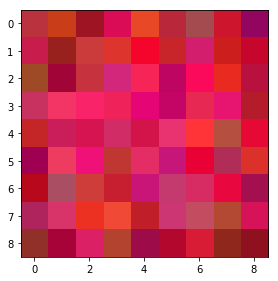

In [107]:
plt.figure(figsize=[10, 10])
for i in range(0, 1):
    plt.subplot(2, 2, i+1)
    w_np = model.conv1.weight[i, :, :, :].detach().cpu().permute(1, 2, 0).numpy()
    w_norm = (w_np-w_np.min())/(w_np.max()-w_np.min())
    plt.imshow(w_norm)

0.0695263 0.0172827


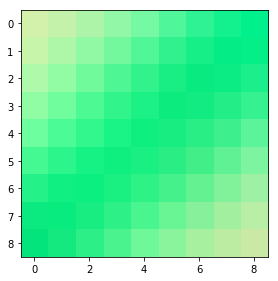

In [108]:
plt.figure(figsize=[10, 10])
for i in range(0, 1):
    plt.subplot(2, 2, i+1)
    w_np = model.conv1.weight.grad[i, :, :, :].detach().cpu().permute(1, 2, 0).numpy()
    print(w_np.max(), w_np.min())
    w_norm = (w_np-w_np.min())/(w_np.max()-w_np.min())
    plt.imshow(w_norm)

-0.0156096 -0.0169474


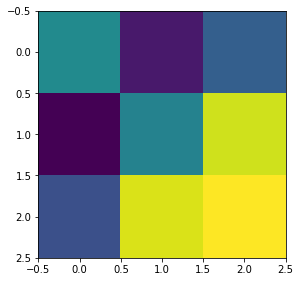

In [44]:
plt.figure(figsize=[10, 10])
for i in range(0, 1):
    plt.subplot(2, 2, i+1)
    w_np = model.conv2.weight.grad[0, i, :, :].detach().cpu().numpy()
    print(w_np.max(), w_np.min())
    w_norm = (w_np-w_np.min())/(w_np.max()-w_np.min())
    plt.imshow(w_norm)

-0.00746717 -0.0221963


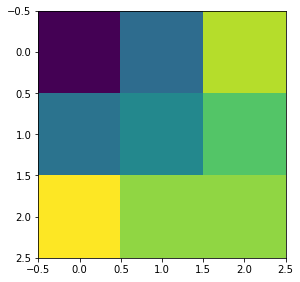

In [74]:
plt.figure(figsize=[10, 10])
for i in range(0, 1):
    plt.subplot(2, 2, i+1)
    w_np = model.conv3.weight.grad[0, i, :, :].detach().cpu().numpy()
    print(w_np.max(), w_np.min())
    w_norm = (w_np-w_np.min())/(w_np.max()-w_np.min())
    plt.imshow(w_norm)

In [49]:
transform_valid = _Compose([
#                         _RandomApply([
#                             _Resize(scale_range=(0.5, 1.5), raw=RAW_IMAGE_SIZE),
#                         ], p=0.99),
#                         _RandomCrop(MODEL_INPUT_SIZE, MODEL_INPUT_SIZE, padding_mode='symmetric'),
                        _RandomRotation(0.999, 360),
                        _ColorJitter(brightness=0.2, contrast=0.3, saturation=0.2, hue=0.02),
                        _RandomHorizontalFlip(0.5),
                        _RandomVerticalFlip(0.5),
#                         _RandomGrayscale(0.01),
                        _Lambda(lambda x, y: (_ToTensor()(x), _ToTensor()(y)))
                ])
laser_dataset_valid = LaserDataset('laser/train', train=True, class_nums=2, transform=transform_valid)
laser_loader_valid = torch.utils.data.DataLoader(laser_dataset_valid,
                                          batch_size=1,
                                          shuffle=True,
                                          num_workers=8)

0.9998553991317749 3.525803759703587e-16


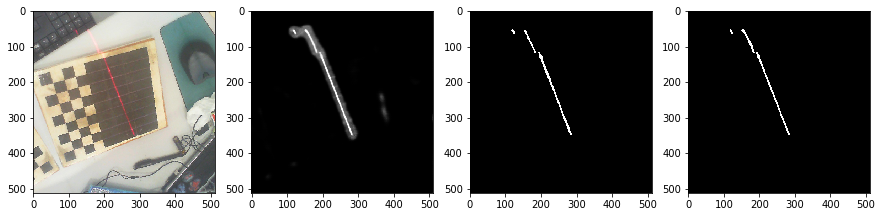

0.999843955039978 9.950591926173492e-19


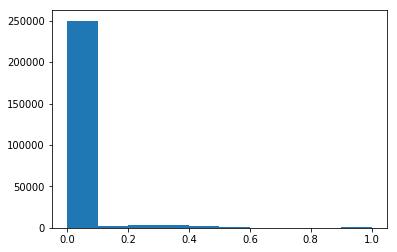

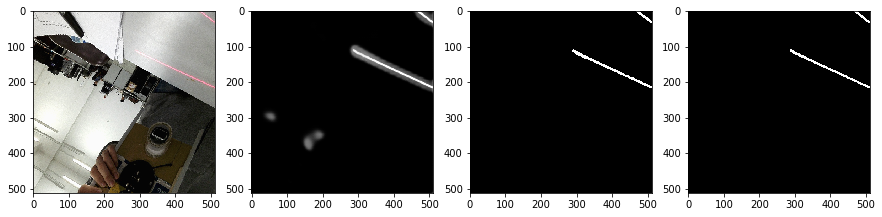

0.9997707009315491 2.774900401866797e-22


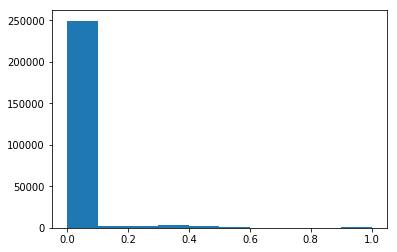

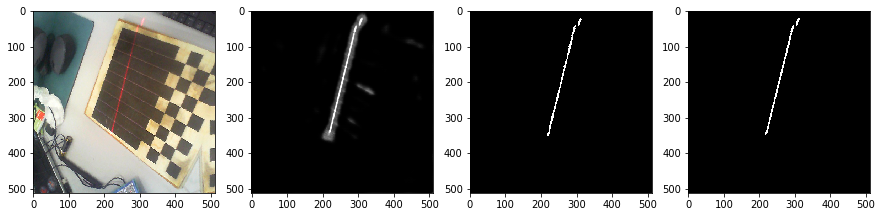

0.9993140697479248 3.0905178187859123e-21


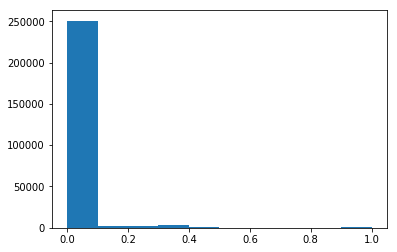

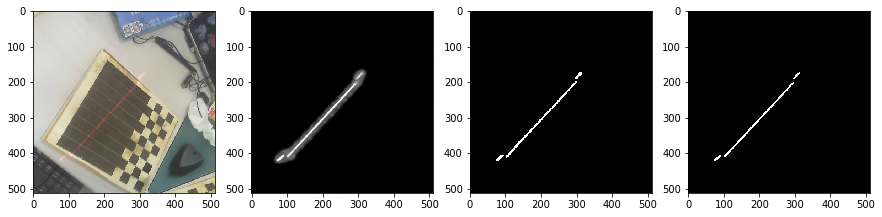

0.999829888343811 7.1886148070764505e-25


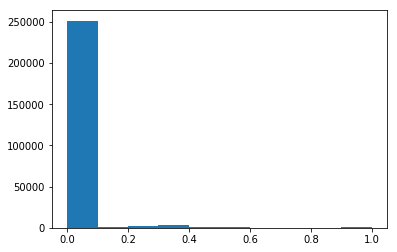

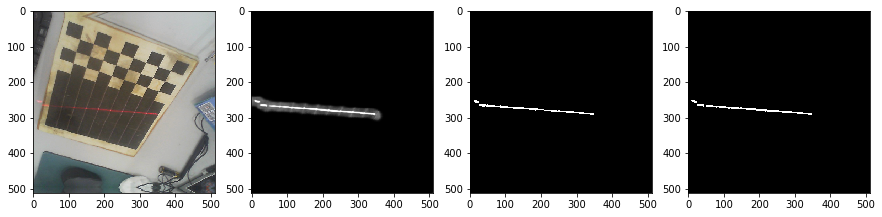

0.9984433054924011 2.7851525091885306e-24


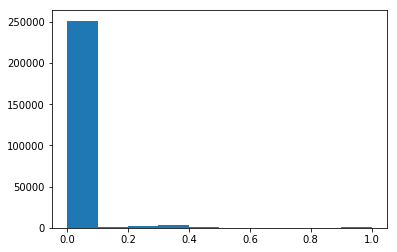

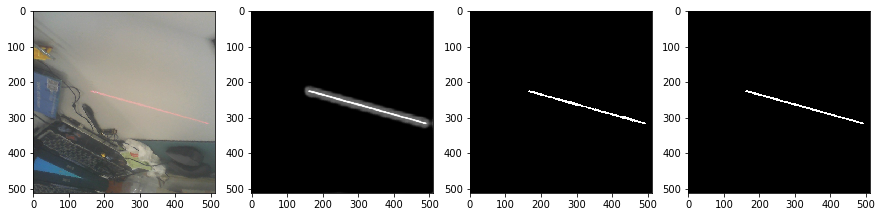

0.9999361038208008 1.510880837081742e-23


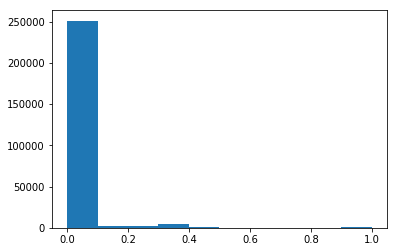

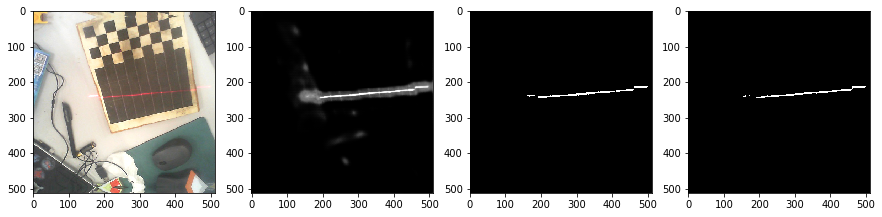

0.9998893737792969 1.6339026413327895e-21


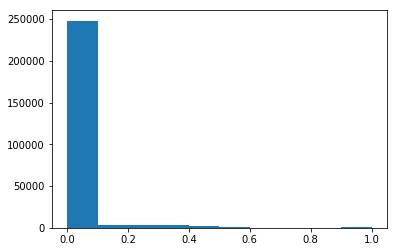

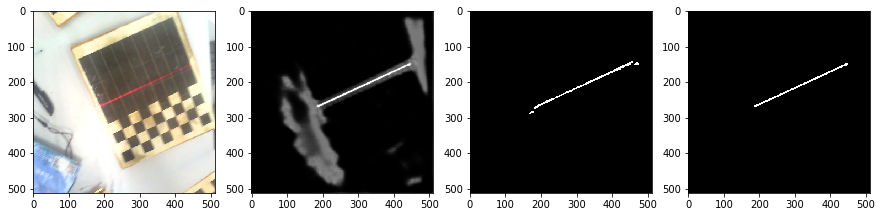

0.9997859597206116 1.1113261194735858e-20


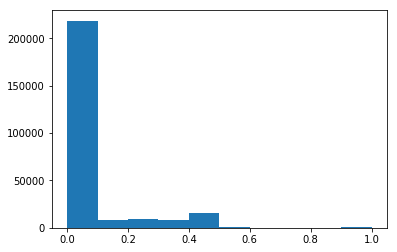

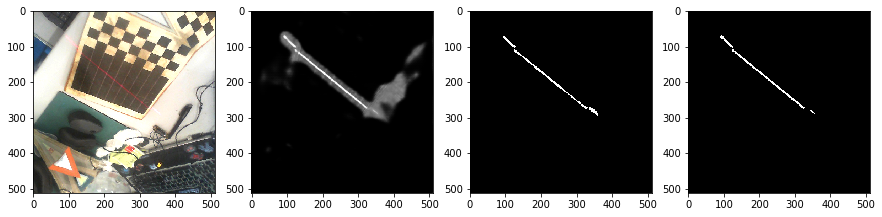

0.9992486834526062 7.753439828911876e-17


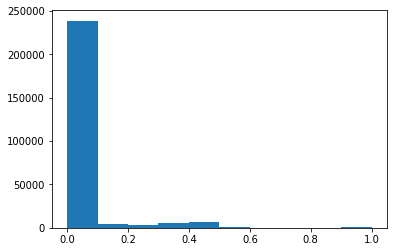

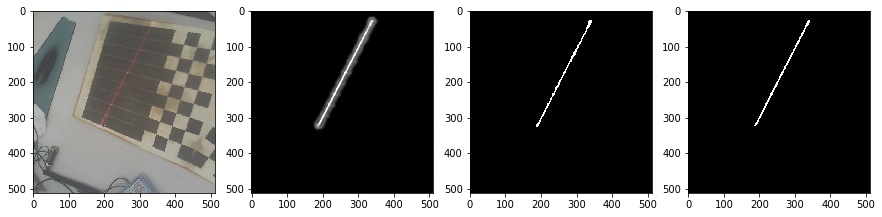

0.9996923208236694 4.94894110501104e-13


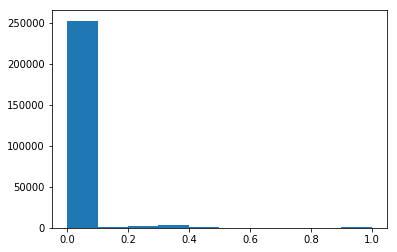

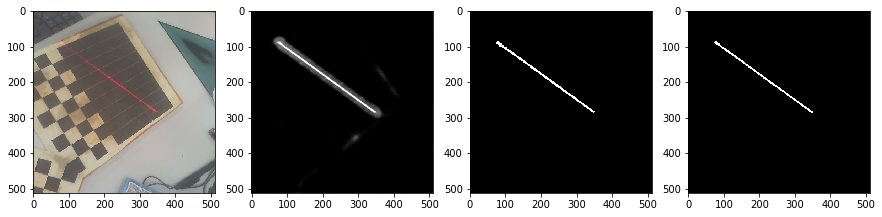

0.9996471405029297 1.052280280030348e-17


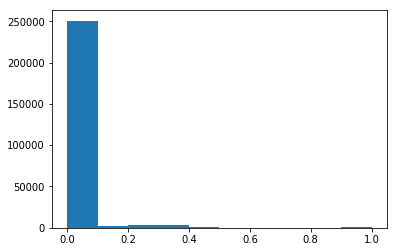

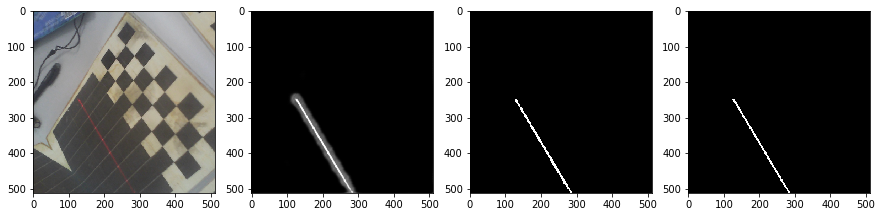

0.9996594190597534 2.807979049971764e-26


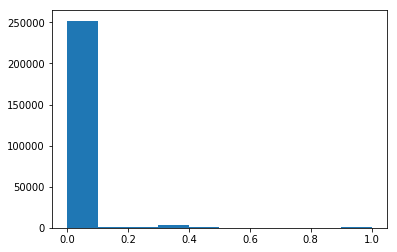

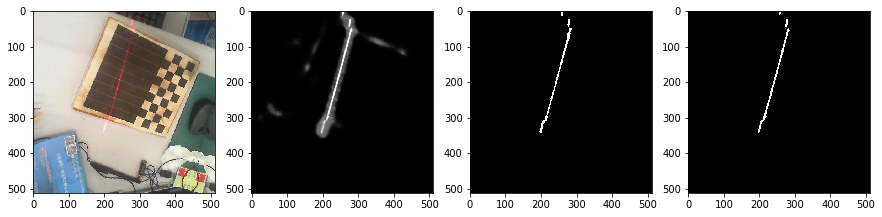

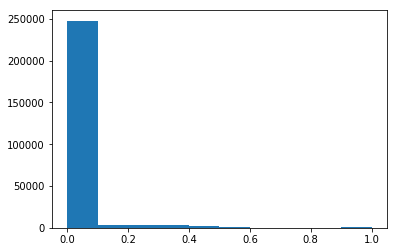

In [54]:
model.eval()
for x, y in laser_loader_valid:
    if train_config['is_cuda_type']:
        x = x.cuda()
    out = model(x)
    out_np = torch.sigmoid(out).squeeze(0).squeeze(0).cpu().detach().numpy()
    print(out_np.max().item(), out_np.min().item())
    out_bi = out_np > 0.6
    y_np = torch.sigmoid(y).squeeze(0).squeeze(0).cpu().detach().numpy()
    
    plt.figure(figsize=[15, 5])
    plt.subplot(141)
    plt.imshow(x.squeeze(0).cpu().detach().permute(1, 2, 0).numpy())
    plt.subplot(142)
    plt.imshow(out_np, 'gray')
    plt.subplot(143)
    plt.imshow(y_np, 'gray')
    plt.subplot(144)
    plt.imshow(out_bi, 'gray')
    plt.show()
    plt.figure()
    plt.hist(out_np.reshape(-1))

In [55]:
%timeit out = model(x)

27.1 ms ± 2.87 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [1]:
1000/30

33.333333333333336

In [56]:
torch.save(model, 'laser_model.pth')

In [95]:
torch.nn.ELU()(torch.arange(-10, 10, dtype=torch.float))

tensor([-1.0000, -0.9999, -0.9997, -0.9991, -0.9975, -0.9933, -0.9817, -0.9502,
        -0.8647, -0.6321,  0.0000,  1.0000,  2.0000,  3.0000,  4.0000,  5.0000,
         6.0000,  7.0000,  8.0000,  9.0000])

In [112]:
for i in range(0, 4):
    print('----')
    print('min', model.conv1.weight[i, :, :, :].detach().cpu().permute(1, 2, 0).numpy().min())
    print('max', model.conv1.weight[i, :, :, :].detach().cpu().permute(1, 2, 0).numpy().max())

----
min -0.0637123
max 0.0637147
----
min -0.0641065
max 0.0637025
----
min -0.0640966
max 0.0640039
----
min -0.0630816
max 0.063639


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


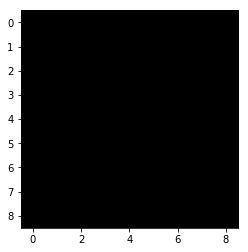

In [23]:
plt.imshow()

In [55]:
y.shape

torch.Size([1, 1, 480, 640])

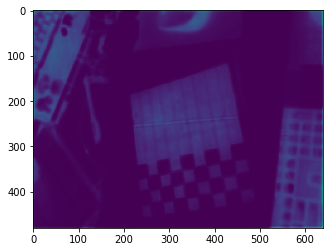

In [23]:
plt.imshow(out_np)

In [68]:
out.shape

torch.Size([1, 1, 480, 640])

In [69]:
out.max()

tensor(-1.1207, device='cuda:0', grad_fn=<MaxBackward1>)

In [70]:
out.min()

tensor(-10.8760, device='cuda:0', grad_fn=<MinBackward1>)

In [28]:
model.conv1.weight[0, 0, :, :].max()

tensor(0.0920, device='cuda:0', grad_fn=<MaxBackward1>)

In [29]:
model.conv1.weight[0, 0, :, :].min()

tensor(-0.0338, device='cuda:0', grad_fn=<MinBackward1>)

In [59]:
model.conv1.weight.grad.shape

torch.Size([4, 3, 9, 9])

In [53]:
def show_log(log, lis=None):
    if lis is not None:
        for key in lis:
            log_ = {}
            log_[key] = log[key]
    else:
        log_ = log
    for k, v in log_.items():
        plt.plot(v[:])
    plt.ylim([0, 2])
    plt.legend([k for k, v in log_.items()])
    plt.show()

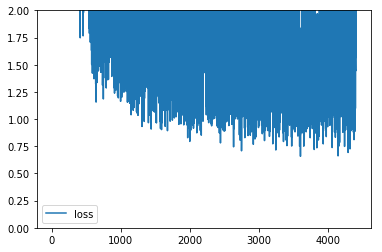

In [54]:
show_log(log)

In [162]:
model

ShallowNet(
  (conv1): Conv2d(3, 1, kernel_size=(9, 9), stride=(1, 1), padding=(4.0, 4.0), bias=False)
)

In [139]:
plt.imshow(y[1])

IndexError: index 1 is out of bounds for dimension 0 with size 1

In [ ]:
np.meshgrid

In [13]:
f_path = './laser/label'
fn = os.listdir(f_path)[0]

In [19]:
img = cv2.imread(f_path+'/'+fn)

In [28]:
img[:, :, 2].min()

0

In [20]:
img.shape

(480, 640, 3)

In [3]:
p = Path('.')